In [205]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sympy

In [206]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("ECG_reposo.txt", delimiter="\t")
array2= np.genfromtxt("ECG_sinrespirar1.txt", delimiter="\t")
array3= np.genfromtxt("ECG_reposo2.txt", delimiter="\t")
array4= np.genfromtxt("ECG_movimiento.txt", delimiter="\t")
d_sensor = array1[:,-2]
print("Sensor 1:",d_sensor)
d_sensor2 = array2[:,-2]
print("Sensor 2:",d_sensor2)
d_sensor3= array3[:,-2]
print("Sensor 3:",d_sensor3)
d_sensor4= array4[:,-2]
print("Sensor 4:",d_sensor4)

Sensor 1: [506. 507. 506. ... 512. 510. 510.]
Sensor 2: [507. 509. 511. ... 527. 527. 527.]
Sensor 3: [507. 508. 509. ... 540. 540. 537.]
Sensor 4: [493. 495. 497. ... 497. 498. 500.]


In [207]:
#eje de tiempo en seg
Fs=1000; #Frecuencia de muestreo
Ts=1/Fs
d_sensor=d_sensor[0:2800]
d_sensor2=d_sensor2[0:2800]
d_sensor3=d_sensor3[0:2800]
d_sensor4=d_sensor4[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(d_sensor)
n = np.arange(0,M)

t = n/Fs

In [208]:
def analisis_espectral(x3,Fs): 
    N=len(x3)
    X3 = np.fft.fft(x3,N)
    X3 = X3[0:N//2]
    X3m = np.abs(X3)
    F = np.linspace(0,Fs/2,N//2)

    plt.plot(F, X3m)
    plt.grid(linestyle=":")
    plt.title("Analisis espectral de las señales")
    plt.xlabel("Frecuencias (hz)")
    plt.ylabel("FFT (db)")
    plt.xlim([0,100])
    plt.ylim([0,0.125*1e6])

    plt.show()

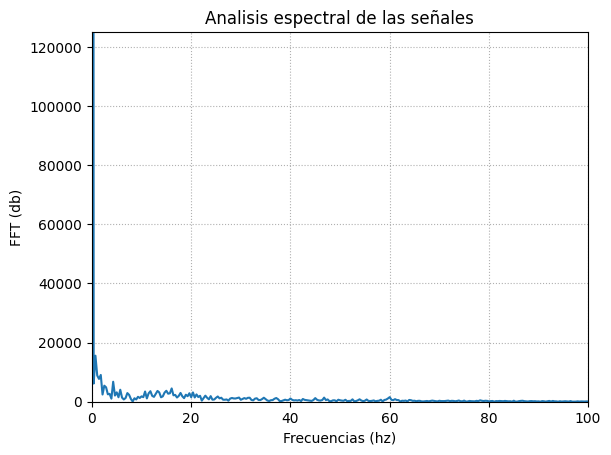

In [209]:
analisis_espectral(d_sensor,Fs)

In [210]:
## Diseño del filtro pasa bajo 

In [211]:
wp=2*np.pi*94
ws=2*np.pi*157
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")

Orden del filtro: 9
Frecuencia de corte calculada: 94.02 hz


In [212]:
# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

#np.set_printoptions(precision=3)
b,a

(array([8.76598489e+24]),
 array([1.00000000e+00, 3.40213914e+03, 5.78727538e+06, 6.42557892e+09,
        5.11443542e+12, 3.02148193e+15, 1.32488800e+18, 4.16471856e+20,
        8.54492363e+22, 8.76598489e+24]))

Text(0, 0.5, 'Magnitud (db)')

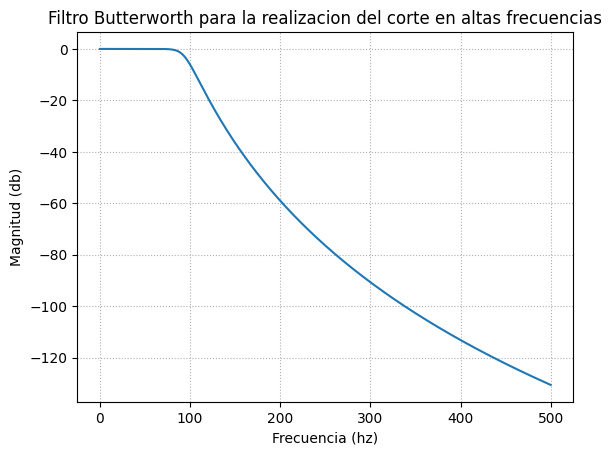

In [224]:
# Respuesta en frecuencia del filtro analogico
Fmax=500
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.title("Filtro Butterworth para la realizacion del corte en altas frecuencias")
plt.ylabel("Magnitud (db)")

## TRansformada bilineal de H(s) a H(z)

Text(0, 0.5, 'Magnitud (db)')

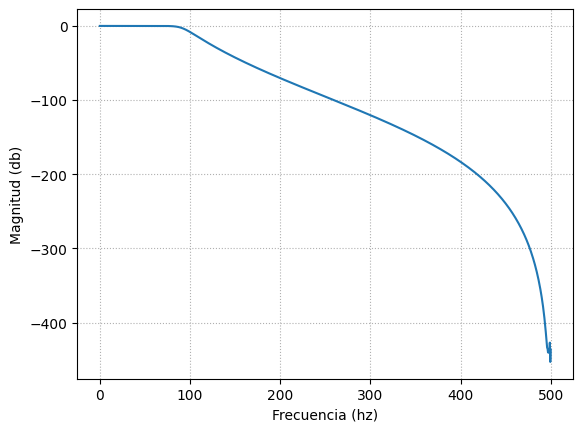

In [225]:
bd, ad = signal.bilinear(b,a,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")

## Filtrado

In [237]:
def filtrado(bd,ba,x3,Fs,texto):
    y = signal.lfilter(bd,ad, x3)
    N=len(x3)
    Yf = np.fft.fft(y,N)
    Yf = Yf[:N//2]
    Ym = np.abs(Yf)

    Fd = np.linspace(0, Fs//2, N//2)
    plt.plot(Fd, Ym)
    plt.grid(linestyle=":")
    plt.title(texto)
    plt.xlim([0,100])
    plt.ylim([0,0.125*1e6])
    return y
    

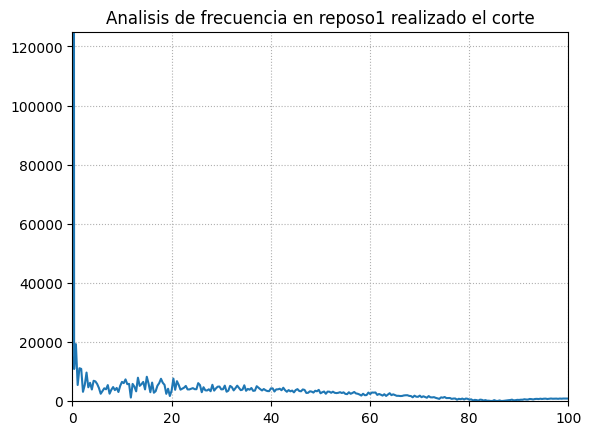

In [238]:
Y1=filtrado(bd,ad,d_sensor,Fs,"Analisis de frecuencia en reposo1 realizado el corte")

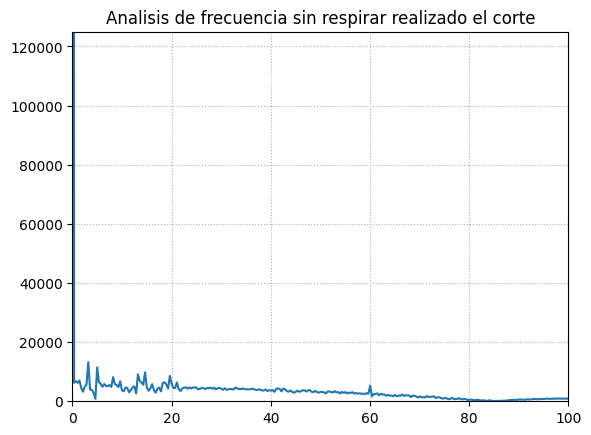

In [245]:
Y2=filtrado(bd,ad,d_sensor2,Fs,"Analisis de frecuencia sin respirar realizado el corte")

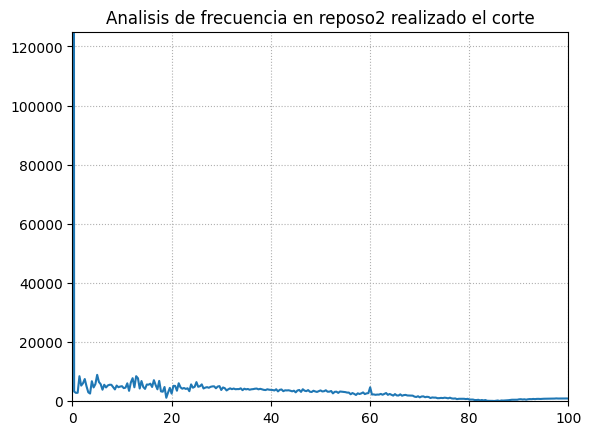

In [246]:
Y3=filtrado(bd,ad,d_sensor3,Fs,"Analisis de frecuencia en reposo2 realizado el corte")

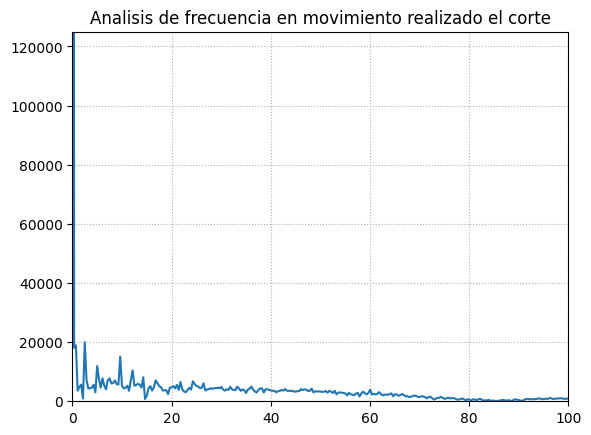

In [247]:
Y4=filtrado(bd,ad,d_sensor4,Fs,"Analisis de frecuencia en movimiento realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo En reposo1 realizado el corte')

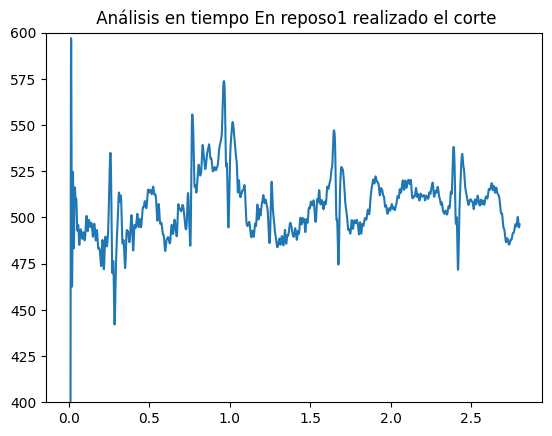

In [248]:
plt.plot(t,Y1)
plt.ylim([400,600])
plt.title(" Análisis en tiempo En reposo1 realizado el corte")    

Text(0.5, 1.0, ' Análisis en tiempo sin respirar realizado el corte')

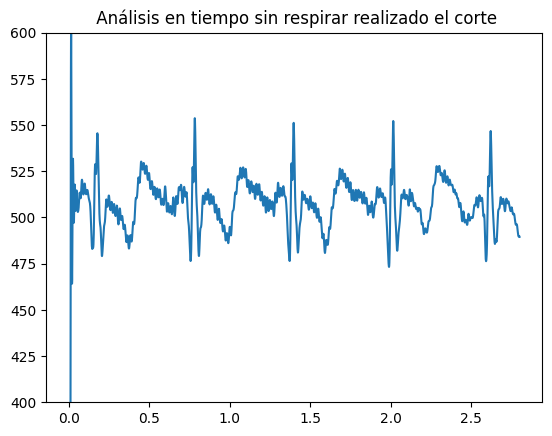

In [249]:
plt.plot(t,Y2)
plt.ylim([400,600])
plt.title(" Análisis en tiempo sin respirar realizado el corte")    

Text(0.5, 1.0, ' Análisis en tiempo en reposo2 realizado el corte')

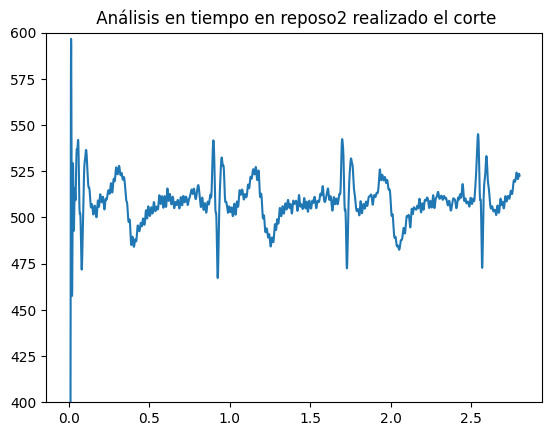

In [250]:
plt.plot(t,Y3)
plt.ylim([400,600])
plt.title(" Análisis en tiempo en reposo2 realizado el corte")    

Text(0.5, 1.0, ' Análisis en tiempo en movimiento realizado el corte')

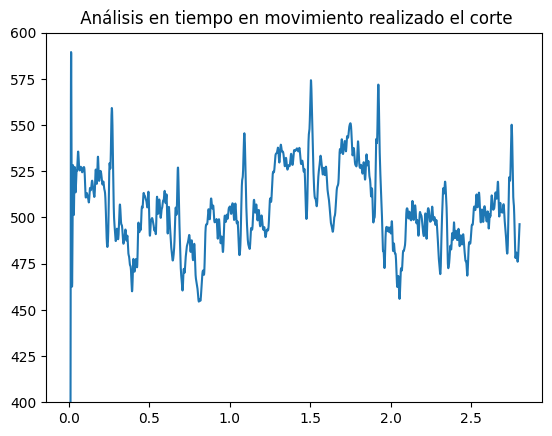

In [251]:
plt.plot(t,Y4)
plt.ylim([400,600])
plt.title(" Análisis en tiempo en movimiento realizado el corte")    